epoch=000, w=-0.04 b=1.28, loss=4131.63477
epoch=010, w=4.03 b=3.22, loss=2867.18134
epoch=020, w=4.59 b=4.60, loss=2755.50611
epoch=030, w=4.53 b=5.87, loss=2688.20616
epoch=040, w=4.37 b=7.10, loss=2625.02241
epoch=050, w=4.19 b=8.32, loss=2563.62192
epoch=060, w=4.01 b=9.53, loss=2503.71543
epoch=070, w=3.84 b=10.72, loss=2445.22983
epoch=080, w=3.66 b=11.90, loss=2388.12445
epoch=090, w=3.49 b=13.06, loss=2332.36588
epoch=100, w=3.31 b=14.21, loss=2277.92216
epoch=110, w=3.15 b=15.34, loss=2224.76200
epoch=120, w=2.98 b=16.46, loss=2172.85565
epoch=130, w=2.81 b=17.57, loss=2122.17317
epoch=140, w=2.65 b=18.67, loss=2072.68562
epoch=150, w=2.49 b=19.75, loss=2024.36495
epoch=160, w=2.33 b=20.82, loss=1977.18350
epoch=170, w=2.17 b=21.88, loss=1931.11482
epoch=180, w=2.01 b=22.92, loss=1886.13242
epoch=190, w=1.86 b=23.95, loss=1842.21082
epoch=200, w=1.71 b=24.97, loss=1799.32451
epoch=210, w=1.56 b=25.98, loss=1757.44940
epoch=220, w=1.41 b=26.97, loss=1716.56188
epoch=230, w=1.26

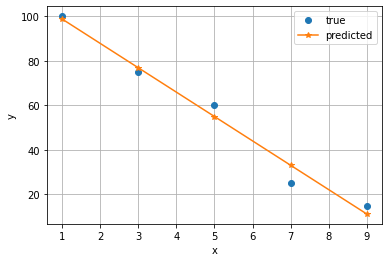

In [ ]:
import torch
import matplotlib.pyplot as plt

def forward(x):
    y_hat = w*x + b
    return y_hat

def loss(y_hat, y):
    l = (y - y_hat)**2
    return l

def update():
    global w, b
    w.data = w.data - alpha*w.grad
    b.data = b.data - alpha*b.grad

def zero_grad():
    w.grad.data.zero_()
    b.grad.data.zero_()

w = torch.tensor([-1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
alpha = 0.0005

x_lst = torch.Tensor([1, 3, 5, 7, 9])
y_lst = torch.Tensor([100, 75, 60, 25, 15])

N_EPOCHS = 5000
N = len(x_lst)
for epoch in range(N_EPOCHS):
    l_sum = 0
    for x, y in zip(x_lst, y_lst):
        y_hat = forward(x)
        l = loss(y_hat, y)
        
        l.backward()
        update()
        zero_grad()

        l_sum += l.item()
    
    l_sum /= N
    if epoch % 10 == 0:
        print(f'epoch={epoch:03}, w={w.item():0.2f}',
              f'b={b.item():0.2f}, loss={l_sum:0.5f}')

y_hat = [w.item()*x+b.item() for x in x_lst]
plt.plot(x_lst, y_lst, 'o')
plt.plot(x_lst, y_hat, '-*')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(('true', 'predicted'))
plt.show()